<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Linear Regression Equation**](#Section11)
  - **1.2** [**Assumptions of Linear Regression**](#Section12)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Standardization**](#Section71)<br>
  - **7.2** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Linear Regression in Scikit-Learn**](#Section81)<br>
  - **8.2** [**Interpreting Model Coefficients**](#Section82)<br>
  - **8.3** [**Using the Model for Prediction**](#Section83)<br>
  - **8.4** [**Model Evaluation**](#section84)<br>
  - **8.5** [**Model Evaluation using R-Squared and adjusted R-squared**](#section85)<br>

**9.** [**Conclusion**](#Section9)<br>



---
# 3. Installing & Importing Libraries
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install --upgrade --force-reinstall pandas
!pip install -q datascience                  
!pip install -q pandas-profiling   

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

conda-repo-cli 1.0.4 requires pathlib, which is not installed.



  Using cached pandas-1.2.4-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl (13.7 MB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.1
    Uninstalling pytz-2021.1:
      Successfully uninstalled pytz-2021.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pand

### 3.2. **Importing Packages** 

In [127]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [111]:
import scipy.stats as stats

In [128]:
data_train = pd.read_csv(r"beijing_train.csv", index_col=0) 
print('Data Shape:', data_train.shape)
display(data_train.head(30))


data_train.info()


Data Shape: (403776, 17)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,-0.70000,1023.00000,-18.80000,0.00000,NNW,4.40000,Aotizhongxin
2,2013,3,1,1,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,-1.10000,1023.20000,-18.20000,0.00000,N,4.70000,Aotizhongxin
3,2013,3,1,2,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,-1.10000,1023.50000,-18.20000,0.00000,NNW,5.60000,Aotizhongxin
4,2013,3,1,3,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,-1.40000,1024.50000,-19.40000,0.00000,NW,3.10000,Aotizhongxin
5,2013,3,1,4,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,-2.00000,1025.20000,-19.50000,0.00000,N,2.00000,Aotizhongxin
6,2013,3,1,5,5.00000,5.00000,18.00000,18.00000,400.00000,66.00000,-2.20000,1025.60000,-19.60000,0.00000,N,3.70000,Aotizhongxin
7,2013,3,1,6,3.00000,3.00000,18.00000,32.00000,500.00000,50.00000,-2.60000,1026.50000,-19.10000,0.00000,NNE,2.50000,Aotizhongxin
8,2013,3,1,7,3.00000,6.00000,19.00000,41.00000,500.00000,43.00000,-1.60000,1027.40000,-19.10000,0.00000,NNW,3.80000,Aotizhongxin
9,2013,3,1,8,3.00000,6.00000,16.00000,43.00000,500.00000,45.00000,0.10000,1028.30000,-19.20000,0.00000,NNW,4.10000,Aotizhongxin


<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 55.5+ MB


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [115]:
display(data[['PM2.5','PM10']])

In [129]:
data_train.describe()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.00000,403776.00000,403776.00000,403776.00000,395301.00000,397554.00000,395000.00000,391917.00000,383515.00000,390769.00000,403512.00000,403511.00000,403507.00000,403515.00000,403538.00000
mean,2014.56419,6.73538,15.74822,11.50000,79.24828,104.32790,15.73306,50.35278,1214.84334,58.11933,14.08890,1010.28253,3.15729,0.06705,1.71838
std,1.09750,3.35648,8.80889,6.92220,79.14671,90.13640,21.73946,34.77191,1124.28568,57.37597,11.30353,10.35678,13.61727,0.83784,1.23796
min,2013.00000,1.00000,1.00000,0.00000,2.00000,2.00000,0.28560,1.02650,100.00000,0.21420,-19.90000,982.40000,-43.40000,0.00000,0.00000
25%,2014.00000,4.00000,8.00000,5.75000,21.00000,36.00000,2.00000,23.00000,500.00000,11.00000,4.00000,1002.00000,-8.00000,0.00000,0.90000
50%,2015.00000,7.00000,16.00000,11.50000,55.00000,83.00000,7.00000,43.00000,900.00000,45.00000,15.40000,1009.80000,4.20000,0.00000,1.40000
75%,2016.00000,10.00000,23.00000,17.25000,110.00000,145.00000,19.00000,71.00000,1500.00000,83.00000,23.50000,1018.30000,15.50000,0.00000,2.20000
max,2016.00000,12.00000,31.00000,23.00000,999.00000,999.00000,500.00000,290.00000,10000.00000,1071.00000,41.60000,1042.80000,29.10000,72.50000,13.20000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [130]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 55.5+ MB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

profile = ProfileReport(df = data_train)
profile.to_file('Pre Profiling Report_beijing_train.html')
##print('Accomplished!')

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [131]:
data=data_train.drop(columns=['RAIN','wd'])

In [132]:
#since the data is based hourly replacing will prev and later values would bring the data set close to the real world
data = data.ffill().bfill()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    403776 non-null  float64
 5   PM10     403776 non-null  float64
 6   SO2      403776 non-null  float64
 7   NO2      403776 non-null  float64
 8   CO       403776 non-null  float64
 9   O3       403776 non-null  float64
 10  TEMP     403776 non-null  float64
 11  PRES     403776 non-null  float64
 12  DEWP     403776 non-null  float64
 13  WSPM     403776 non-null  float64
 14  station  403776 non-null  object 
dtypes: float64(10), int64(4), object(1)
memory usage: 49.3+ MB


In [120]:
##if all the columns have nan values drop them because there is no useful information we can get 
#data.dropna(subset=['PM2.5'], how='all',inplace=True)
#data.dropna(subset=['PM2.5','PM10','SO2','NO2','CO','O3'], how='all',inplace=True)
#data.dropna(subset=['TEMP','PRES','DEWP','WSPM'],how='all',inplace=True)
#data[data.isna().any(axis=1)]


In [133]:
display(data.describe())
data.info()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
count,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000,403776.00000
mean,2014.56419,6.73538,15.74822,11.50000,79.62776,104.81785,15.84185,50.25823,1224.24987,58.17920,14.08594,1010.28539,3.15328,1.71844
std,1.09750,3.35648,8.80889,6.92220,79.67553,91.09701,22.39654,34.97975,1133.19065,59.05638,11.30485,10.35644,13.62107,1.23807
min,2013.00000,1.00000,1.00000,0.00000,2.00000,2.00000,0.28560,1.02650,100.00000,0.21420,-19.90000,982.40000,-43.40000,0.00000
25%,2014.00000,4.00000,8.00000,5.75000,21.00000,36.00000,2.00000,23.00000,500.00000,10.00000,4.00000,1002.00000,-8.00000,0.90000
50%,2015.00000,7.00000,16.00000,11.50000,55.00000,83.00000,7.00000,43.00000,900.00000,45.00000,15.40000,1009.80000,4.20000,1.40000
75%,2016.00000,10.00000,23.00000,17.25000,111.00000,146.00000,19.00000,71.00000,1500.00000,83.00000,23.60000,1018.30000,15.50000,2.20000
max,2016.00000,12.00000,31.00000,23.00000,999.00000,999.00000,500.00000,290.00000,10000.00000,1071.00000,41.60000,1042.80000,29.10000,13.20000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    403776 non-null  float64
 5   PM10     403776 non-null  float64
 6   SO2      403776 non-null  float64
 7   NO2      403776 non-null  float64
 8   CO       403776 non-null  float64
 9   O3       403776 non-null  float64
 10  TEMP     403776 non-null  float64
 11  PRES     403776 non-null  float64
 12  DEWP     403776 non-null  float64
 13  WSPM     403776 non-null  float64
 14  station  403776 non-null  object 
dtypes: float64(10), int64(4), object(1)
memory usage: 49.3+ MB


In [134]:
data[data.isna().any(axis=1)]



,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,station
REF_NO,,,,,,,,,,,,,,,


In [135]:
# #Treating outliers with monthly mean amputation

data['PM2.5']=data['PM2.5'].apply(lambda  x:0 if x>400 else x)
data['PM2.5'] = data['PM2.5'].replace(0, np.nan)
data['PM2.5']=data['PM2.5'].fillna(data.groupby(['station','year','month'])['PM2.5'].transform('mean'))
#data['PM2.5']=data['PM2.5'].fillna(data.groupby(['station','year','month','day','hour'])['PM2.5'].transform('max'))
#data['PM2.5']=data['PM2.5'].ffill().bfill()

#ffill bfill is not giving a good nd curve for cube root so going for transorm

data[data.isna().any(axis=1)]



,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,station
REF_NO,,,,,,,,,,,,,,,


In [136]:
data['PM10']=data['PM10'].apply(lambda  x:0 if x>400 else x)
data['PM10'] = data['PM10'].replace(0, np.nan)
data['PM10']=data['PM10'].fillna(data.groupby(['station','year','month'])['PM2.5'].transform('mean'))

In [137]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    403776 non-null  float64
 5   PM10     403776 non-null  float64
 6   SO2      403776 non-null  float64
 7   NO2      403776 non-null  float64
 8   CO       403776 non-null  float64
 9   O3       403776 non-null  float64
 10  TEMP     403776 non-null  float64
 11  PRES     403776 non-null  float64
 12  DEWP     403776 non-null  float64
 13  WSPM     403776 non-null  float64
 14  station  403776 non-null  object 
dtypes: float64(10), int64(4), object(1)
memory usage: 49.3+ MB


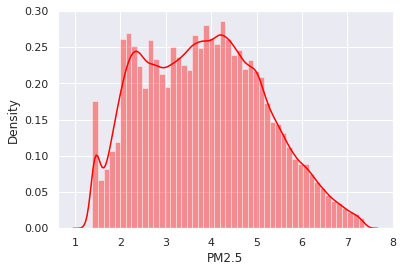

In [138]:
sns.distplot(np.cbrt(data['PM2.5']),bins=50,color='red')

plt.savefig('Graph with cube root of 2.5<250 tranform mean.png')

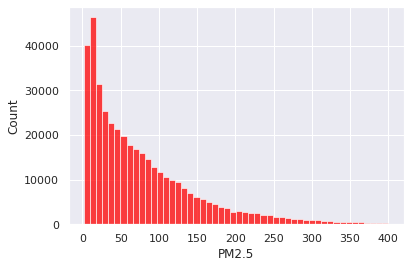

In [139]:
sns.histplot(data['PM2.5'],bins=50,color='red')
plt.savefig('distribution plot less than 250 transform mean.png')

In [140]:
data.corr()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
year,1.00000,-0.09152,-0.00154,0.00000,-0.05782,-0.06952,-0.19529,-0.07823,-0.02717,0.01176,-0.06344,0.11136,-0.07773,0.07803
month,-0.09152,1.00000,0.00848,0.00000,0.01400,-0.03152,-0.21789,0.06006,0.08316,-0.13009,0.06572,0.05668,0.21228,-0.13633
day,-0.00154,0.00848,1.00000,0.00000,0.01640,0.03423,-0.00228,0.02773,0.00452,-0.00538,0.01166,0.02396,0.02534,-0.01751
hour,0.00000,0.00000,0.00000,1.00000,0.01227,0.05541,0.03029,-0.00329,-0.02981,0.27593,0.14362,-0.03871,-0.01181,0.14229
PM2.5,-0.05782,0.01400,0.01640,0.01227,1.00000,0.86192,0.45820,0.62246,0.69873,-0.12355,-0.10496,0.00632,0.13787,-0.27214
PM10,-0.06952,-0.03152,0.03423,0.05541,0.86192,1.00000,0.45139,0.61914,0.60844,-0.08297,-0.06510,-0.03626,0.10031,-0.20414
SO2,-0.19529,-0.21789,-0.00228,0.03029,0.45820,0.45139,1.00000,0.47778,0.53177,-0.15908,-0.32632,0.22769,-0.27492,-0.10027
NO2,-0.07823,0.06006,0.02773,-0.00329,0.62246,0.61914,0.47778,1.00000,0.67485,-0.45181,-0.27580,0.17687,-0.03620,-0.38734
CO,-0.02717,0.08316,0.00452,-0.02981,0.69873,0.60844,0.53177,0.67485,1.00000,-0.29813,-0.33571,0.19841,-0.07354,-0.28334
O3,0.01176,-0.13009,-0.00538,0.27593,-0.12355,-0.08297,-0.15908,-0.45181,-0.29813,1.00000,0.58865,-0.44619,0.31337,0.28833


In [141]:
data.drop(columns=['station','year','month','day','hour','O3','TEMP','PRES','WSPM','DEWP'],inplace=True)

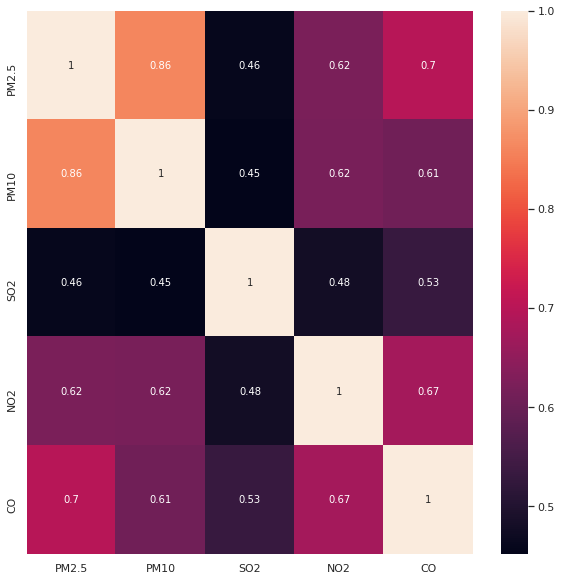

In [142]:
corr= data.iloc[ :,: ].corr()
top_features =corr.index
plt.figure(figsize=(10,10))
sns.heatmap(data[top_features].corr(), annot=True)
plt.savefig('corr without cbrt of y.png')

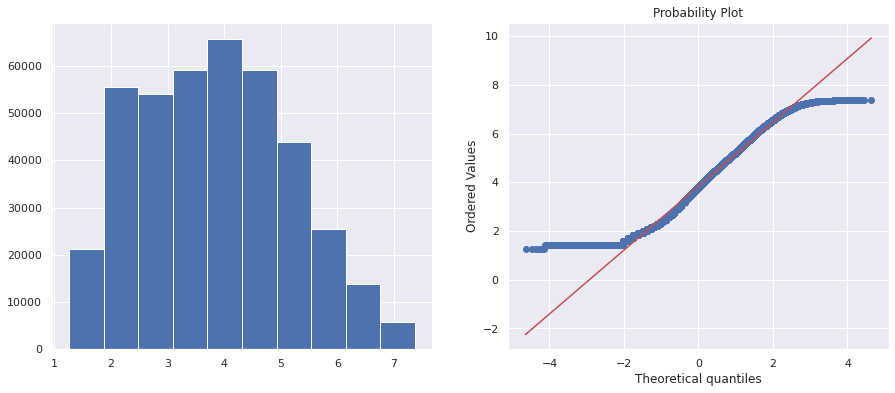

In [146]:
y_cbrt=np.cbrt(data['PM2.5'])


plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
y_cbrt.hist()
    
plt.subplot(1,2,2)
stats.probplot(y_cbrt, dist ='norm', plot=plt)
plt.show()


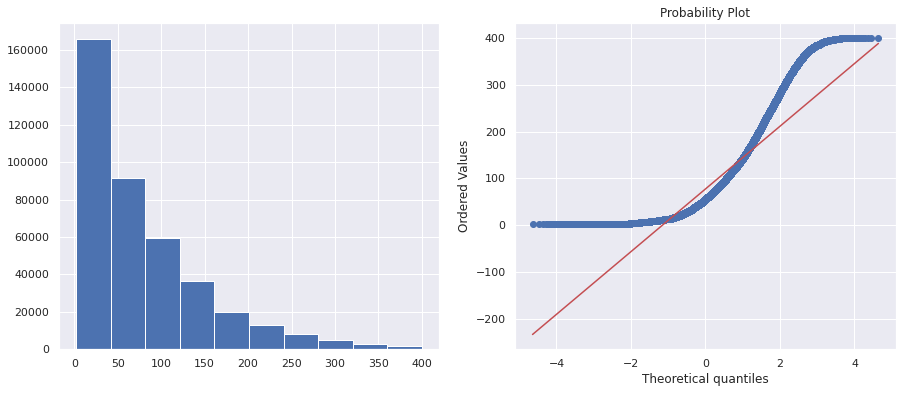

In [145]:
y=data['PM2.5']
plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
y.hist()
    
plt.subplot(1,2,2)
stats.probplot(y, dist ='norm', plot=plt)
plt.show()
    

corr= data.iloc[ :,: ].corr()
top_features =corr.index
plt.figure(figsize=(10,10))
sns.heatmap(data[top_features].corr(), annot=True)
plt.savefig('corr wit log y.png')

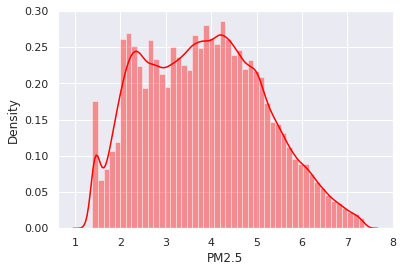

In [147]:
sns.distplot(y_cbrt, bins = 50, color = 'red')

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

pair_plot=sns.pairplot(Data_final)
pair_plot.savefig('graphs between beijing data.png')

Note : To check your profiling please **uncomment** the code and run it

<a name = Section7></a>

---
# **7. Post Data Processing**
---



<a name = Section73></a>
### **7.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [180]:
feature_cols = ['PM10','SO2','NO2','CO']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

In [181]:
y =data['PM2.5']
y.head() #didnt transform the target variable 

REF_NO
1   4.00000
2   8.00000
3   7.00000
4   6.00000
5   3.00000
Name: PM2.5, dtype: float64

- Now we will **split** our **data** into **training** and **testing**

In [182]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [183]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)



Train cases as below
X_train shape:  (323020, 4)
y_train shape:  (323020,)

Test cases as below
X_test shape:  (80756, 4)
y_test shape:  (80756,)


###**7.2 Data Standardization**

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
display(X_train,X_test)


array([[0.15326633, 0.00343076, 0.25252662, 0.1010101 ],
       [0.21105528, 0.02544333, 0.20407927, 0.17171717],
       [0.16582915, 0.0054319 , 0.03797407, 0.02020202],
       ...,
       [0.89949749, 0.05546048, 0.52244756, 0.25252525],
       [0.46984925, 0.01743876, 0.24906609, 0.19191919],
       [0.14321608, 0.00343076, 0.06219774, 0.02020202]])

array([[0.08291457, 0.03544905, 0.19023717, 0.07070707],
       [0.68592965, 0.05145819, 0.28713187, 0.50505051],
       [0.04271357, 0.01143533, 0.02413197, 0.05050505],
       ...,
       [0.12311558, 0.02544333, 0.08642142, 0.08080808],
       [0.16582915, 0.01143533, 0.18677664, 0.19191919],
       [0.51758794, 0.03945133, 0.35980289, 0.29292929]])

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Linear Regression model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **MSE**, **MAE** and **RMSE** scores.

- We will do **feature selection** and see if the scores improves. 

- We will also add a new categorical feature **Area** and assign values randomly and see if we can improve the scores.

### **8.1 Linear regression in scikit-learn**

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. **Load** the `algorithm`

2. **Instantiate** and **Fit** the model to the `training` dataset

3. **Prediction** on the `test` set

4. **Calculating** Root mean square error 

<br> 
The code block given below shows how these steps are carried out:<br/>

```
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
```

In [185]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
y_trans=np.cbrt(y_train) #applying cube rt transformation for only train data

linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

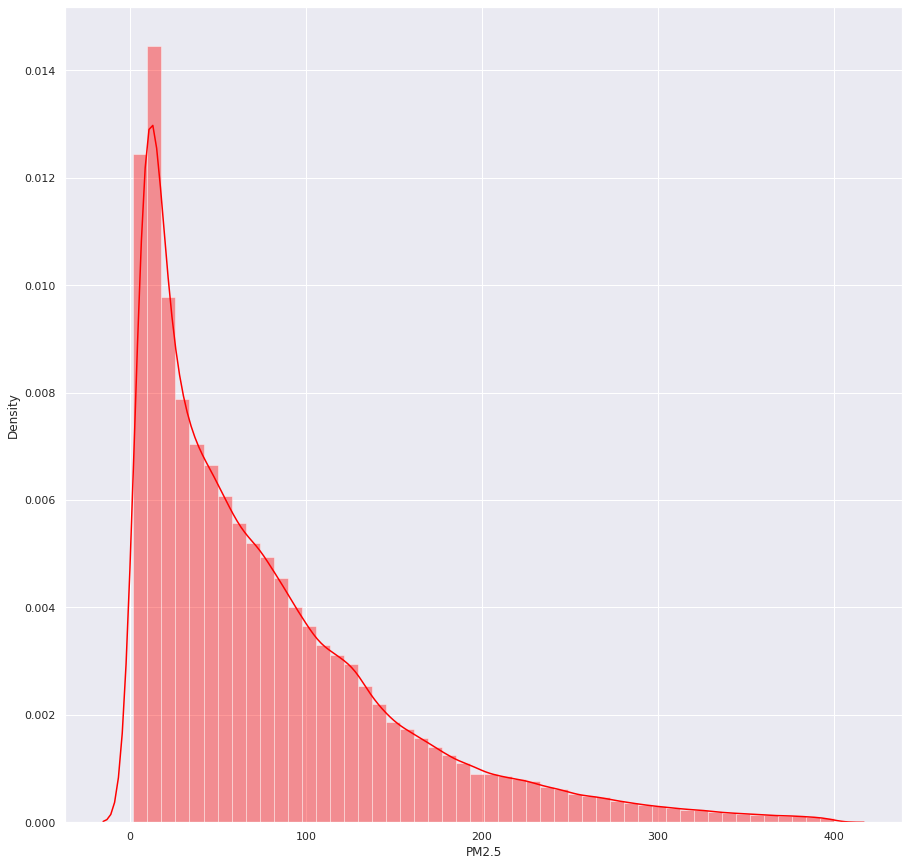

In [186]:
sns.distplot(y_train,bins=50,color='red')

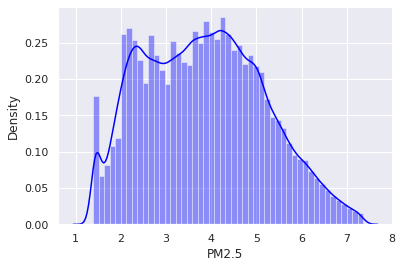

In [155]:
sns.distplot(y_trans,bins=50,color='blue')

### **8.2 Interpreting Model Coefficients**

In [187]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -5.7575371088626355
Coefficients: [252.5374061   -7.91761572   8.70957193 172.3403976 ]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [188]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)       

In [189]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)
    

Intercept -5.7575371088626355
PM10 252.53740610156854
SO2 -7.917615721777324
NO2 8.709571930968323
CO 172.34039759762595


### **8.3 Using the Model for Prediction**

In [190]:
y_pred_train = linreg.predict(X_train)  
y_predtrain=y_pred_train**3

In [191]:
y_pred_test = linreg.predict(X_test)
y_predtest=y_pred_test**3

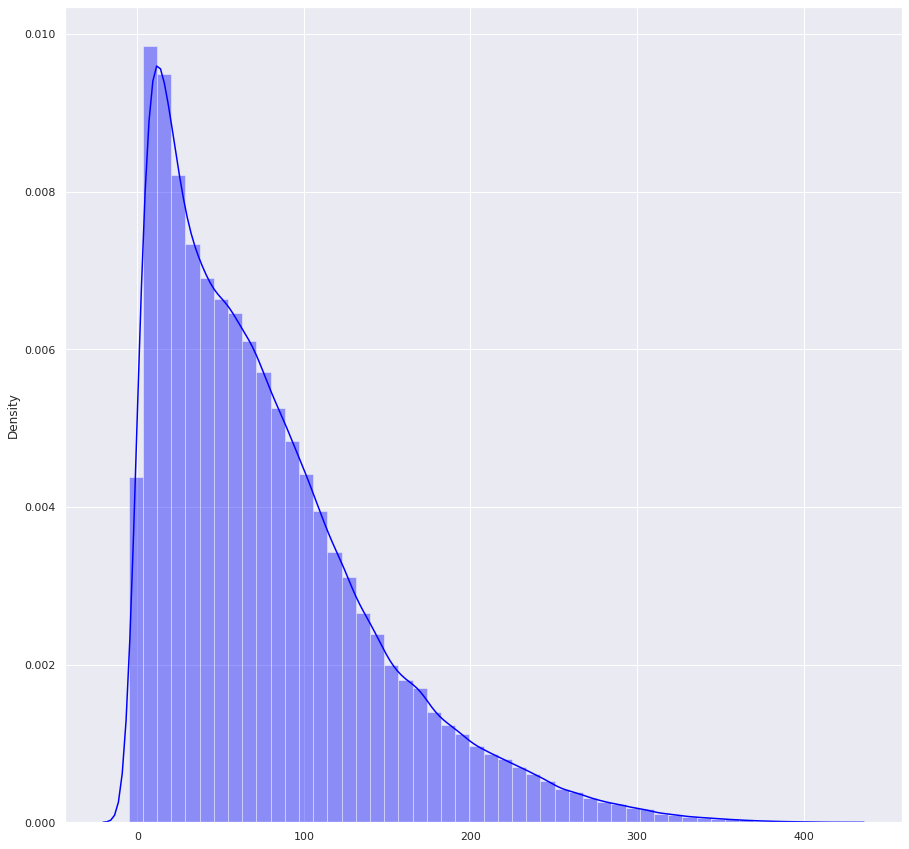

In [192]:
sns.distplot(y_pred_train,bins=50,color='blue')

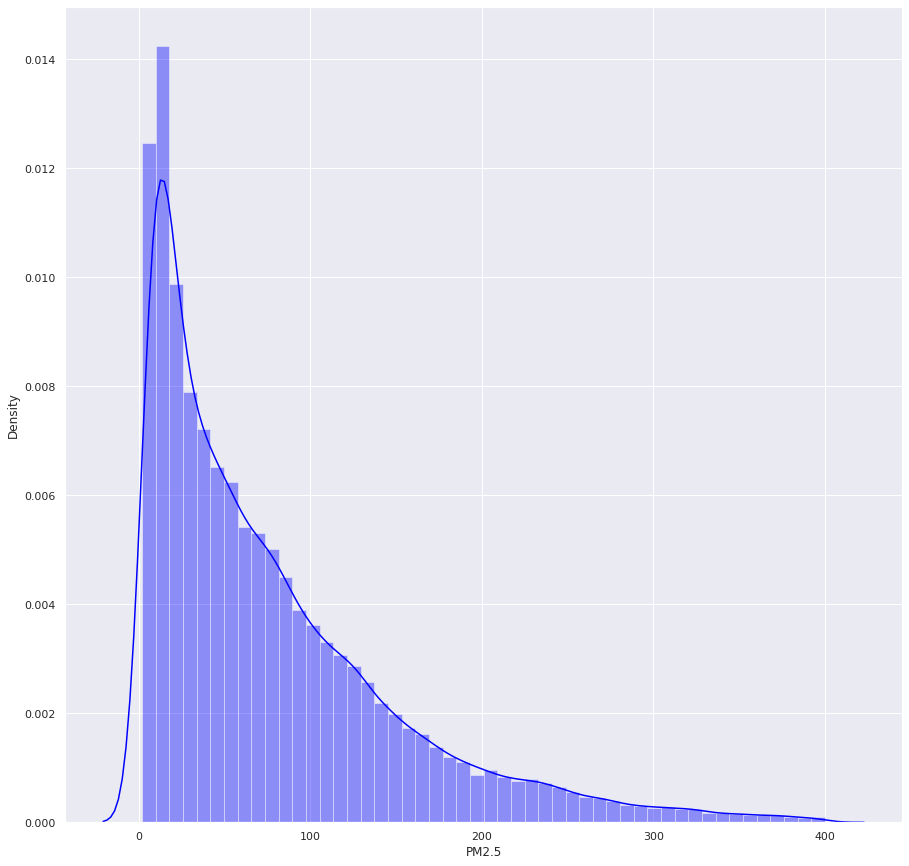

In [193]:
sns.distplot(y_test,bins=50,color='blue')

Let's Plot and see how our model is predicting with the test data

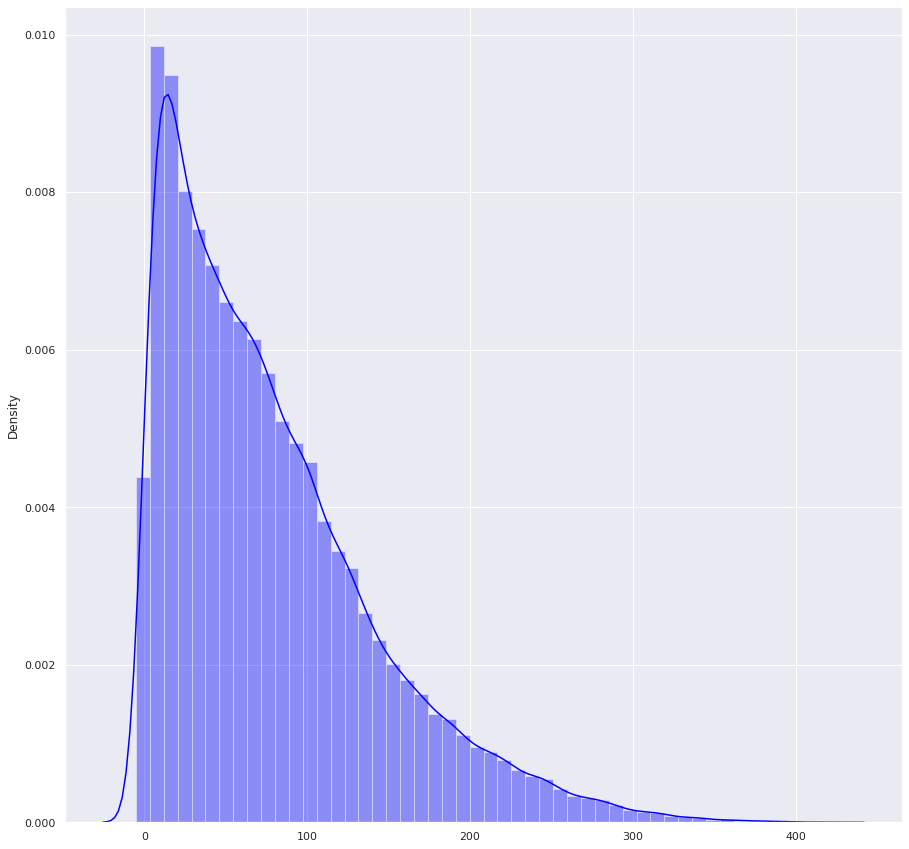

In [194]:
sns.distplot(y_pred_test,bins=50,color='blue')

Text(0, 0.5, 'Predicted Values')

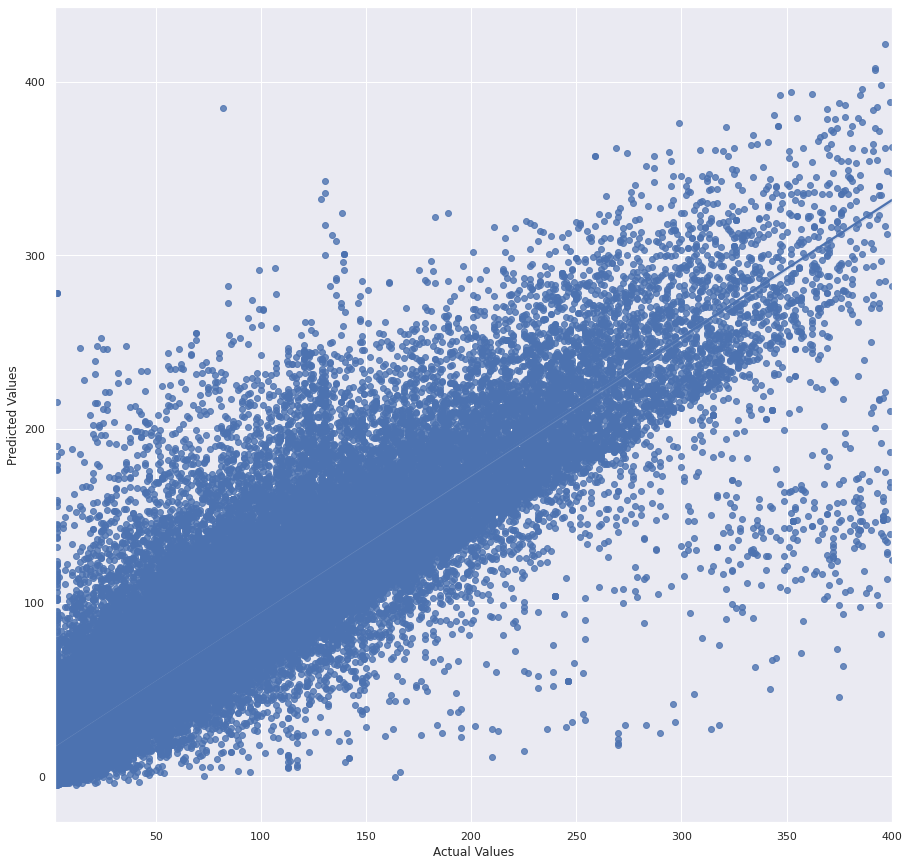

In [195]:
sns.set(rc={'figure.figsize':(15, 15)})


sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


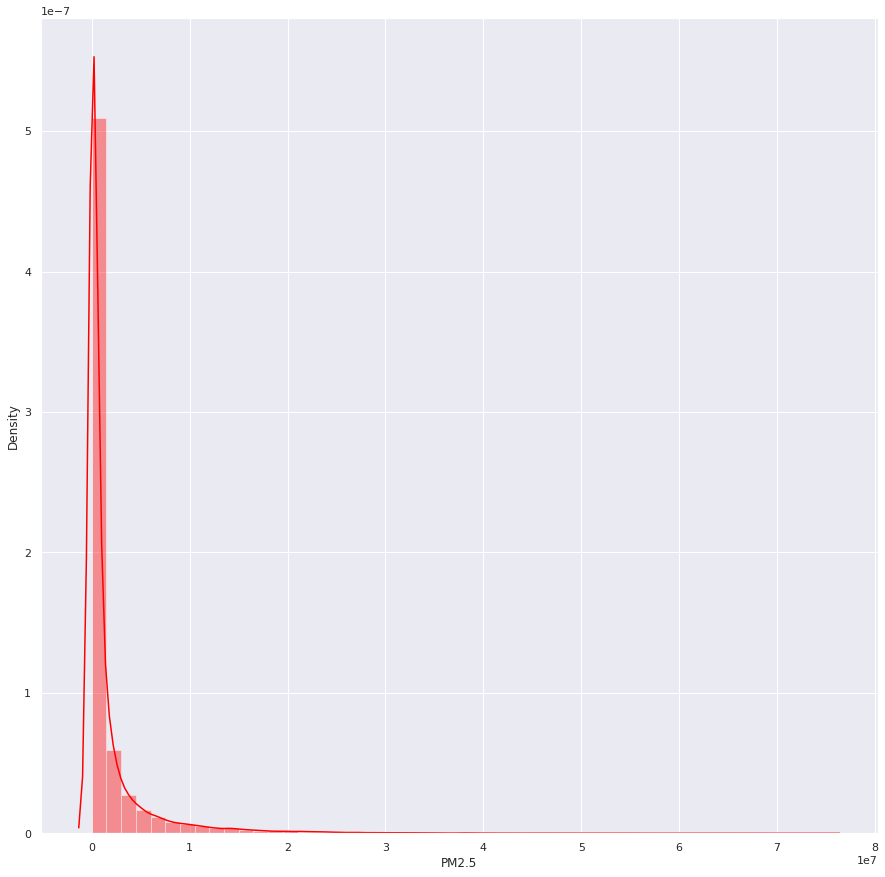

In [196]:
error=y_predtest-y_test
sns.distplot(error, bins = 50, color = 'red')

## **8.4 Model evaluation** 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.

For example, if a model **predicts** that the **price** of apple is `Rs75/kg`, but the **actual price** of apple is `Rs100/kg`, then the **error** in prediction will be `Rs25/kg`.

Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [197]:
from sklearn import metrics

In [202]:

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [199]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1757887.8859272366
MAE for test set is 1740391.9547232604


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [204]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [169]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 1855.9512501111242
MSE for test set is 1837.0619104990285


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [205]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [206]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 33.21565379653025
RMSE for test set is 33.23432824848974


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 

- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.

- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.

### **8.5 Model Evaluation using R-squared and Adjusted R-squared value**

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/r-square-vs-adjusted-r-square-2-638.jpg" width="500" height="240" /></center>

- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)


- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. 


- But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. 


- Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.


There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/maxresdefault.jpg" width="500" height="240"/></center>
<br> 

- **R squared** value increase if we increase the number of independent variables. **Adjusted R-squared** increases only if a significant variable is added.  

 
- **R-squared** value should be near to adjusted **R-squared**. If not, use variable selection techniques to bring **R squared** near to **Adj- R squared**.  A difference of 2% between **R square** and **Adj-R** square is acceptable.

In [207]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.7914437649956964
R2 score for test set is 0.7904524829497075


In [208]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.7914411823758799
Adjusted R2 score for test set is 0.7904421030154875


**Observation**

- The **R-squared** value and **Adjusted R-squared** values for the **training** set is found to be **0.79** and **0.79** respectively

- The **R-squared** value and **Adjusted R-squared** values for the **test** set is found to be **0.79** and **0.79** respectively

In [219]:
data_test = pd.read_csv("beijing_test.csv", index_col=0) 
print('Data Shape:', data_test.shape)
data_test.head()
data_test.columns
data_test.info()
data_test.describe()

Data Shape: (16728, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16728 non-null  int64  
 1   month    16728 non-null  int64  
 2   day      16728 non-null  int64  
 3   hour     16728 non-null  int64  
 4   PM10     16728 non-null  int64  
 5   SO2      16728 non-null  int64  
 6   NO2      16728 non-null  int64  
 7   CO       16728 non-null  int64  
 8   O3       16728 non-null  int64  
 9   TEMP     16728 non-null  float64
 10  PRES     16728 non-null  float64
 11  DEWP     16728 non-null  float64
 12  RAIN     16728 non-null  float64
 13  wd       16728 non-null  object 
 14  WSPM     16728 non-null  float64
 15  station  16728 non-null  object 
dtypes: float64(5), int64(9), object(2)
memory usage: 2.2+ MB


,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000,16728.00000
mean,2017.00000,1.46879,15.23063,11.51417,110.71664,18.13092,57.19829,1584.66045,39.93520,0.34608,1021.83998,-13.45142,0.00247,2.00344
std,0.00000,0.49904,8.58316,6.93354,123.37013,19.29797,41.85503,1740.98201,31.39892,4.70655,6.27244,6.37774,0.03583,1.40687
min,2017.00000,1.00000,1.00000,0.00000,3.00000,1.00000,2.00000,100.00000,1.00000,-13.42500,997.10000,-31.70000,0.00000,0.00000
25%,2017.00000,1.00000,8.00000,6.00000,24.00000,5.00000,21.00000,400.00000,9.00000,-2.80000,1018.00000,-18.70000,0.00000,1.10000
50%,2017.00000,1.00000,15.00000,11.00000,68.00000,12.00000,51.00000,900.00000,38.00000,-0.20000,1022.00000,-13.00000,0.00000,1.60000
75%,2017.00000,2.00000,23.00000,18.00000,153.00000,25.00000,84.00000,2100.00000,64.00000,2.90000,1026.25000,-8.10000,0.00000,2.60000
max,2017.00000,2.00000,31.00000,23.00000,994.00000,300.00000,276.00000,10000.00000,500.00000,16.20000,1037.60000,0.90000,1.10000,12.00000


In [220]:
data_test.drop(columns=['year', 'month','day','hour','O3'],inplace=True)
data_test.drop(columns=['RAIN','station','wd','WSPM'],inplace=True)
data_test.drop(columns=['DEWP','TEMP','PRES'],inplace=True)
data_test.head()
#data_test[data_test['PM10']>500]=data_test['PM10'].mean()

,PM10,SO2,NO2,CO
REF_NO,,,,
33649,496,8,121,6100
33650,497,7,113,6300
33651,469,7,111,6200
33652,425,6,109,5900
33653,468,10,123,7700


In [221]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -5.7575371088626355
Coefficients: [252.5374061   -7.91761572   8.70957193 172.3403976 ]


In [223]:
import math
feature_insaid = ['PM10','SO2','NO2','CO']                # create a Python list of feature names
X_insaid= data_test[feature_insaid] 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X_in = scaler.transform(X_insaid)

X_insaid['y_insaid']= linreg.predict(X_in) 



X_insaid.drop(columns=['PM10','SO2','NO2','CO'],inplace=True)
display(X_insaid.head(50))
X_insaid.to_csv("submission.csv",index=True,header=False)

,y_insaid
REF_NO,
33649,415.63588
33650,419.52674
33651,399.95920
33652,366.77362
33653,425.75101
33654,419.72087
33655,424.73885
33656,404.13123
33657,409.98053


<a name = Section9></a>

---
# **9. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated about the features** which to **retain** and which to **discard**.

- The best **Linear Regression** model for this dataset is found to be the one with the **Area** data.


In [ ]:
data_sample = pd.read_csv(r"C:\Users\satvik\Desktop\datascience\madhavi\Madhavi_ML\ML_project\beijing_sample.csv", index_col=0) 
print('Data Shape:', data_sample.shape)
display(data_sample.head())
data_sample.columns

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\satvik\\Desktop\\datascience\\madhavi\\Madhavi_ML\\ML_project\\beijing_sample.csv'